In [1]:
# install.packages("pheatmap")  # falls noch nicht installiert

library(readxl)
library(dplyr)
library(pheatmap)

# 🔄 Excel-Datei laden
data_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA.xlsx"
df <- read_excel(data_path, sheet = "FINAL_final_final")


Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union


New names:
• `SpCond_uSpercm` -> `SpCond_uSpercm...41`
• `SpCond_uSpercm` -> `SpCond_uSpercm...42`


# heatmap all data 


📊 Verarbeite Fluss: Vestari_Joekulsa

Warning message in cor(numeric_vars, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"
📊 Verarbeite Fluss: Virkisa

Warning message in cor(numeric_vars, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"


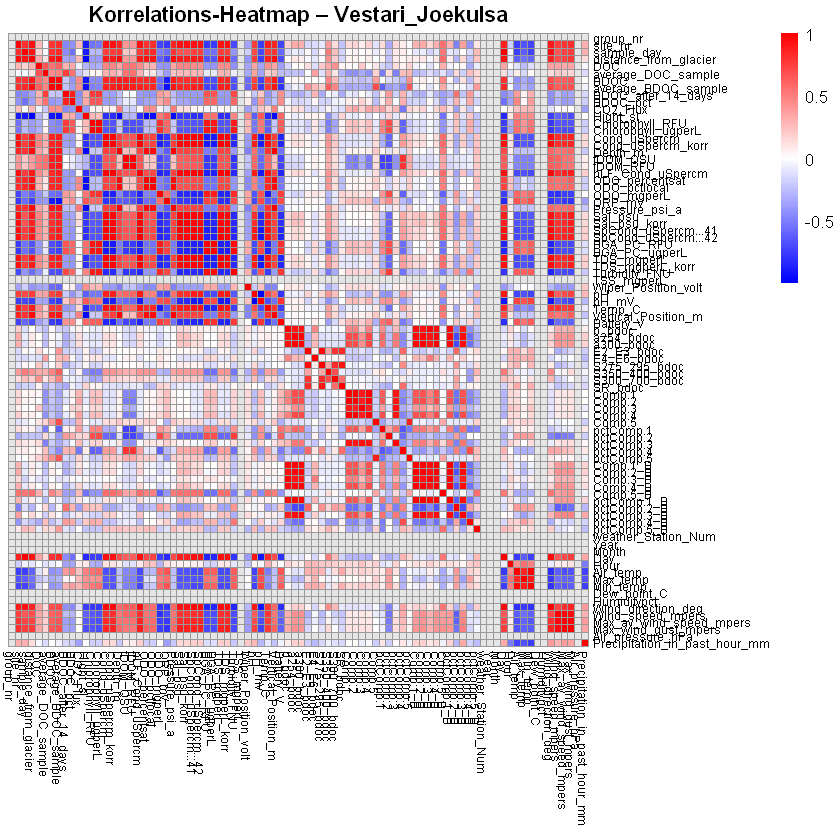

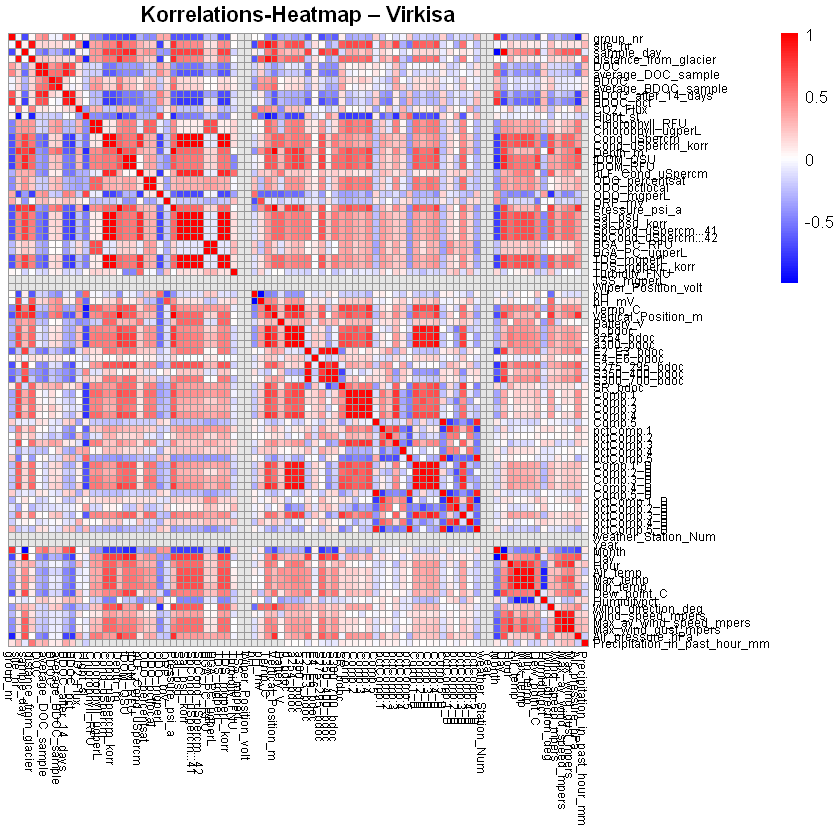

In [2]:


# Spaltennamen trimmen und sicherstellen, dass 'river_name' korrekt ist
colnames(df) <- trimws(colnames(df))
df$river_name <- trimws(as.character(df$river_name))

# Funktion zum Erstellen der Heatmap aller numerischen Parameter für einen Fluss
plot_full_corr_heatmap <- function(data, river_filter) {
  message("📊 Verarbeite Fluss: ", river_filter)

  df_river <- data %>% filter(river_name == river_filter)

  # Nur numerische Spalten auswählen
  numeric_vars <- df_river %>% select(where(is.numeric))

  # Prüfen, ob genügend Daten vorhanden sind
  if (ncol(numeric_vars) < 2) {
    message("⚠️ Nicht genügend numerische Daten für: ", river_filter)
    return(NULL)
  }

  # Korrelation berechnen
  cor_matrix <- cor(numeric_vars, use = "pairwise.complete.obs")

  # Heatmap plotten
  pheatmap(
    cor_matrix,
    cluster_rows = FALSE,
    cluster_cols = FALSE,
    display_numbers = FALSE,
    number_format = "%.2f",
    color = colorRampPalette(c("blue", "white", "red"))(100),
    main = paste("Korrelations-Heatmap –", river_filter),
    na_col = "grey90",
    fontsize_row = 7,
    fontsize_col = 7
  )
}

# 🟦 Heatmap für Vestari_Joekulsa
plot_full_corr_heatmap(df, "Vestari_Joekulsa")

# 🟥 Heatmap für Virkisa
plot_full_corr_heatmap(df, "Virkisa")


# SPEICHERN


In [4]:
# 📦 Pakete laden
library(readxl)
library(dplyr)
library(pheatmap)
library(grid)

# 📥 Excel-Datei laden
data_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA.xlsx"
output_dir <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Heatmaps_total_final"

df <- read_excel(data_path, sheet = "FINAL_final_final")
colnames(df) <- trimws(colnames(df))
df$river_name <- trimws(as.character(df$river_name))

# 🔁 Funktion zum Erstellen und Speichern der Heatmap als PNG
save_corr_heatmap_png <- function(data, river_filter) {
  message("📊 Verarbeite Fluss: ", river_filter)

  df_river <- data %>% filter(river_name == river_filter)
  numeric_vars <- df_river %>% select(where(is.numeric))

  if (ncol(numeric_vars) < 2 || nrow(numeric_vars) < 2) {
    message("⚠️ Nicht genügend numerische Daten für: ", river_filter)
    return(NULL)
  }

  cor_matrix <- cor(numeric_vars, use = "pairwise.complete.obs")

  # Erstelle Heatmap als Objekt
  p <- pheatmap(
    cor_matrix,
    cluster_rows = FALSE,
    cluster_cols = FALSE,
    display_numbers = FALSE,
    number_format = "%.2f",
    color = colorRampPalette(c("blue", "white", "red"))(100),
    main = paste("Korrelations-Heatmap –", river_filter),
    na_col = "grey90",
    fontsize_row = 7,
    fontsize_col = 7,
    silent = TRUE
  )

  # 📤 PNG-Datei speichern
  file_path <- file.path(output_dir, paste0("Heatmap_", river_filter, ".png"))
  png(file_path, width = 2000, height = 1800, res = 250)
  grid::grid.newpage()
  grid::grid.draw(p$gtable)
  dev.off()

  message("✅ PNG gespeichert unter: ", file_path)
}

# 🔷 Für Vestari_Joekulsa speichern
save_corr_heatmap_png(df, "Vestari_Joekulsa")

# 🔶 Für Virkisa speichern
save_corr_heatmap_png(df, "Virkisa")


New names:
• `SpCond_uSpercm` -> `SpCond_uSpercm...41`
• `SpCond_uSpercm` -> `SpCond_uSpercm...42`
📊 Verarbeite Fluss: Vestari_Joekulsa

Warning message in cor(numeric_vars, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"
✅ PNG gespeichert unter: C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Heatmaps_total_final/Heatmap_Vestari_Joekulsa.png

📊 Verarbeite Fluss: Virkisa

Warning message in cor(numeric_vars, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"
✅ PNG gespeichert unter: C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Heatmaps_total_final/Heatmap_Virkisa.png



# ----------------------------------------------------------------------------